# Predicting Diabetes
## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Load and review data

In [2]:
df = pd.read_csv("./data/pima-data.csv")

In [3]:
df.shape

(768, 10)

In [4]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


# Definition of features
From the metadata on the data source we have the following definition of the features.
<table>
<thead>
<tr>
<th>Feature</th>
<th>Description</th>
<th>Comments</th>
</tr>
</thead>
<tbody>
<tr>
<td>num_preg</td>
<td>number of pregnancies</td>
</tr>
<tr>
<td>glucose_conc</td>
<td>Plasma glucose concentration a 2 hours in an oral glucose tolerance test</td>
</tr>
<tr>
<td>diastolic_bp</td>
<td>Diastolic blood pressure (mm Hg)</td>
</tr>
<tr>
<td>thickness</td>
<td>Triceps skin fold thickness (mm)</td>
</tr>
<tr>
<td>insulin</td>
<td>2-Hour serum insulin (mu U/ml)</td>
</tr>
<tr>
<td>bmi</td>
<td>Body mass index (weight in kg/(height in m)^2)</td>
</tr>
<tr>
<td>diab_pred</td>
<td>Diabetes pedigree function</td>
</tr>
<tr>
<td>Age (years)</td>
<td>Age (years)</td>
</tr>
<tr>
<td>skin</td>
<td>????</td>
<td>What is this?</td>
</tr>
<tr>
<td>diabetes</td>
<td>Class variable (1=True, 0=False)</td>
<td>Why is our data boolean (True/False)?</td>
</tr>
</tbody>
</table>

In [6]:
df.isnull().values.any()

False

In [7]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

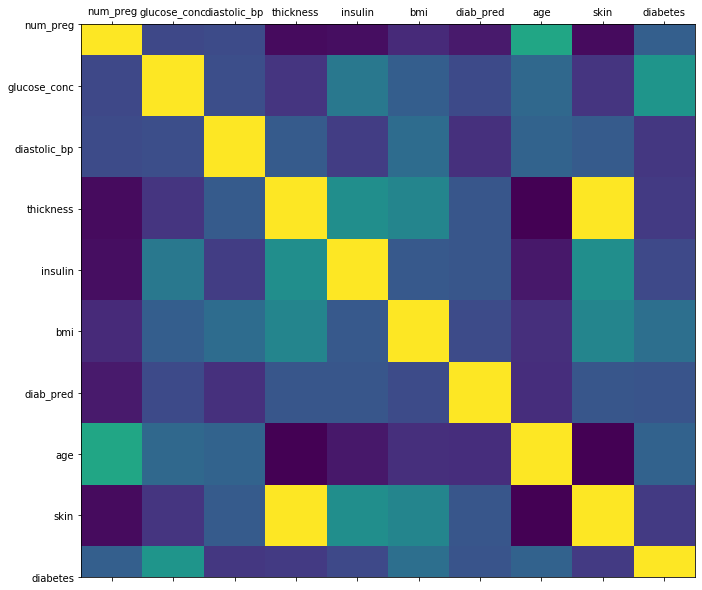

In [8]:
plot_corr(df)

In [9]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [10]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [11]:
del df['skin']

In [12]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


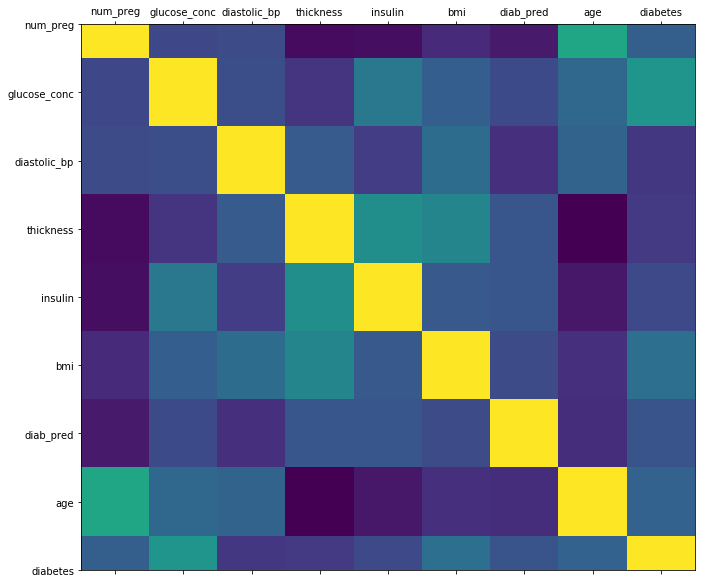

In [13]:
plot_corr(df)

# Check Data Types

In [14]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [15]:
diabetes_map = { True: 1, False: 0 }

In [16]:
df['diabetes'] = df['diabetes'] .map(diabetes_map)

In [17]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("The Number of True Cases: %2d (%2.2f%%)" % ( num_true, (num_true / (num_true + num_false))* 100 ))
print("The Number of False Cases: %2d (%2.2f%%)" % ( num_false, (num_false / (num_true + num_false))* 100 ))


The Number of True Cases: 268 (34.90%)
The Number of False Cases: 500 (65.10%)


### Spliting the data
70 % for training, 30 % for testing.

In [19]:
from sklearn.model_selection import train_test_split
feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values #predictore features
y = df[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [20]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


In [21]:
print("Original True: %2.2f (%2.2f%%)" % (len(df.loc[df['diabetes'] == True]), len(df.loc[df['diabetes'] == True])/ len(df.index) * 100))
print("Original False: %2.2f (%2.2f%%)" % (len(df.loc[df['diabetes'] == False]), len(df.loc[df['diabetes'] == False])/ len(df.index) * 100))
print("Training True: %2.2f (%2.2f%%)" % (len(y_train[y_train == 1]), len(y_train[y_train == 1])/ len(y_train) * 100))
print("Training False: %2.2f (%2.2f%%)" % (len(y_train[y_train == 0]), len(y_train[y_train == 0])/ len(y_train) * 100))
print("Test True: %2.2f (%2.2f%%)" % (len(y_test[y_test == 1]), len(y_test[y_test == 1])/ len(y_test) * 100))
print("Test False: %2.2f (%2.2f%%)" % (len(y_test[y_test == 0]), len(y_test[y_test == 0])/ len(y_test) * 100))

Original True: 268.00 (34.90%)
Original False: 500.00 (65.10%)
Training True: 188.00 (35.01%)
Training False: 349.00 (64.99%)
Test True: 80.00 (34.63%)
Test False: 151.00 (65.37%)


# Post Split Data Preparation

### Hidden missing values

In [22]:
print("# rows in dataframe %d" % (len(df)))
print("# rows missing glucose_conc dataframe %d" % (len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp dataframe %d" % (len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness dataframe %d" % (len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin dataframe %d" % (len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi dataframe %d" % (len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred dataframe %d" % (len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age dataframe %d" % (len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc dataframe 5
# rows missing diastolic_bp dataframe 35
# rows missing thickness dataframe 227
# rows missing insulin dataframe 374
# rows missing bmi dataframe 11
# rows missing diab_pred dataframe 0
# rows missing age dataframe 0


### Impute with mean

In [23]:
from sklearn.impute import SimpleImputer
#impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

# Training Initial Algorithm - Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

## Performance on Training Data

In [25]:
nb_predict_train = nb_model.predict(X_train)

#import pertformamnce metrics
from sklearn import metrics

#training metrics
print("Accurancy %0.4f" % (metrics.accuracy_score(y_train, nb_predict_train)))

Accurancy 0.7542


In [26]:
#predit values using test data
nb_predict_test = nb_model.predict(X_test)

#import pertformamnce metrics
from sklearn import metrics

#training metrics
print("Accurancy %0.4f" % (metrics.accuracy_score(y_test, nb_predict_test)))

Accurancy 0.7359


### Metrics

In [27]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, nb_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

# Predict Training Data

In [29]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: %0.4f" % metrics.accuracy_score(y_train, rf_predict_train))

Accuracy: 0.9870


# Predict Test Data

In [30]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: %0.4f" % metrics.accuracy_score(y_test, rf_predict_test))

Accuracy: 0.7100


In [31]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[121  30]
 [ 37  43]]

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       151
           1       0.59      0.54      0.56        80

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231



# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear', C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)
# training metrics
print("Accuracy: %0.4f" % metrics.accuracy_score(y_test, lr_predict_test))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7446
[[128  23]
 [ 36  44]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



### Setting regularization parameter in a loop

1st max value of 0.613 occured at C=1.500


Text(0, 0.5, 'recall score')

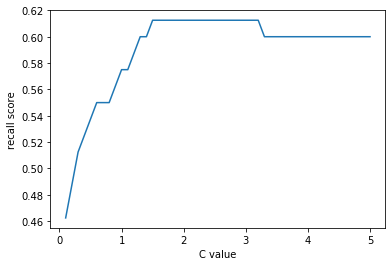

In [38]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42, solver='liblinear')
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

## LogisticRegresssionCV

In [40]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced", max_iter=500)  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=500, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=42, refit=False, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

In [41]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.6883
[[107  44]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       151
           1       0.54      0.65      0.59        80

    accuracy                           0.69       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.71      0.69      0.69       231

